In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# load the dataset
data = "synthetic_nurse_data.csv"
df = pd.read_csv(data)

print(df.head())

### Exploratory data analysis ###


                      Job Title      Location       Hospital Name  \
0           RegisteredNurse_ICU   Detroit, NC   Detroit NonProfit   
1     RegisteredNurse_Pediatric   Seattle, PA   Seattle Community   
2    RegisteredNurse_Cardiology  New York, ND   New York Veterans   
3  RegisteredNurse_CriticalCare  New York, MD  New York Community   
4           RegisteredNurse_ICU   Chicago, MO   Chicago Corporate   

  Contract Start Date Contract End Date  Hourly Pay Rate  
0          2024-03-15        2024-03-29            48.67  
1          2024-10-05        2024-12-21            60.96  
2          2023-02-17        2023-03-24            93.92  
3          2023-08-20        2023-08-27            62.13  
4          2023-12-12        2024-02-20            31.33  


In [28]:
# last 5 rows
df.tail()

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate
249995,RegisteredNurse_CriticalCare,"Phoenix, UT",Phoenix Community,2024-05-10,2024-07-26,44.45
249996,RegisteredNurse_Oncology,"Atlanta, WI",Atlanta Corporate,2024-03-19,2024-03-26,71.75
249997,RegisteredNurse_Oncology,"Houston, AL",Houston Community,2024-04-09,2024-06-18,37.79
249998,RegisteredNurse_MedSurg,"New York, OK",New York Community,2023-01-03,2023-02-28,47.71
249999,RegisteredNurse_Telemetry,"Seattle, MN",Seattle Corporate,2024-10-29,2025-01-07,36.79


In [29]:
# find if there are any missing values
df.isna().sum()

Job Title              0
Location               0
Hospital Name          0
Contract Start Date    0
Contract End Date      0
Hourly Pay Rate        0
dtype: int64

In [30]:
df.duplicated().sum()

1

In [31]:
df.drop_duplicates()

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate
0,RegisteredNurse_ICU,"Detroit, NC",Detroit NonProfit,2024-03-15,2024-03-29,48.67
1,RegisteredNurse_Pediatric,"Seattle, PA",Seattle Community,2024-10-05,2024-12-21,60.96
2,RegisteredNurse_Cardiology,"New York, ND",New York Veterans,2023-02-17,2023-03-24,93.92
3,RegisteredNurse_CriticalCare,"New York, MD",New York Community,2023-08-20,2023-08-27,62.13
4,RegisteredNurse_ICU,"Chicago, MO",Chicago Corporate,2023-12-12,2024-02-20,31.33
...,...,...,...,...,...,...
249995,RegisteredNurse_CriticalCare,"Phoenix, UT",Phoenix Community,2024-05-10,2024-07-26,44.45
249996,RegisteredNurse_Oncology,"Atlanta, WI",Atlanta Corporate,2024-03-19,2024-03-26,71.75
249997,RegisteredNurse_Oncology,"Houston, AL",Houston Community,2024-04-09,2024-06-18,37.79
249998,RegisteredNurse_MedSurg,"New York, OK",New York Community,2023-01-03,2023-02-28,47.71


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Title            250000 non-null  object 
 1   Location             250000 non-null  object 
 2   Hospital Name        250000 non-null  object 
 3   Contract Start Date  250000 non-null  object 
 4   Contract End Date    250000 non-null  object 
 5   Hourly Pay Rate      250000 non-null  float64
dtypes: float64(1), object(5)
memory usage: 11.4+ MB


C:\Users\Ishwar\AppData\Local\Temp\ipykernel_29900\10869844.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


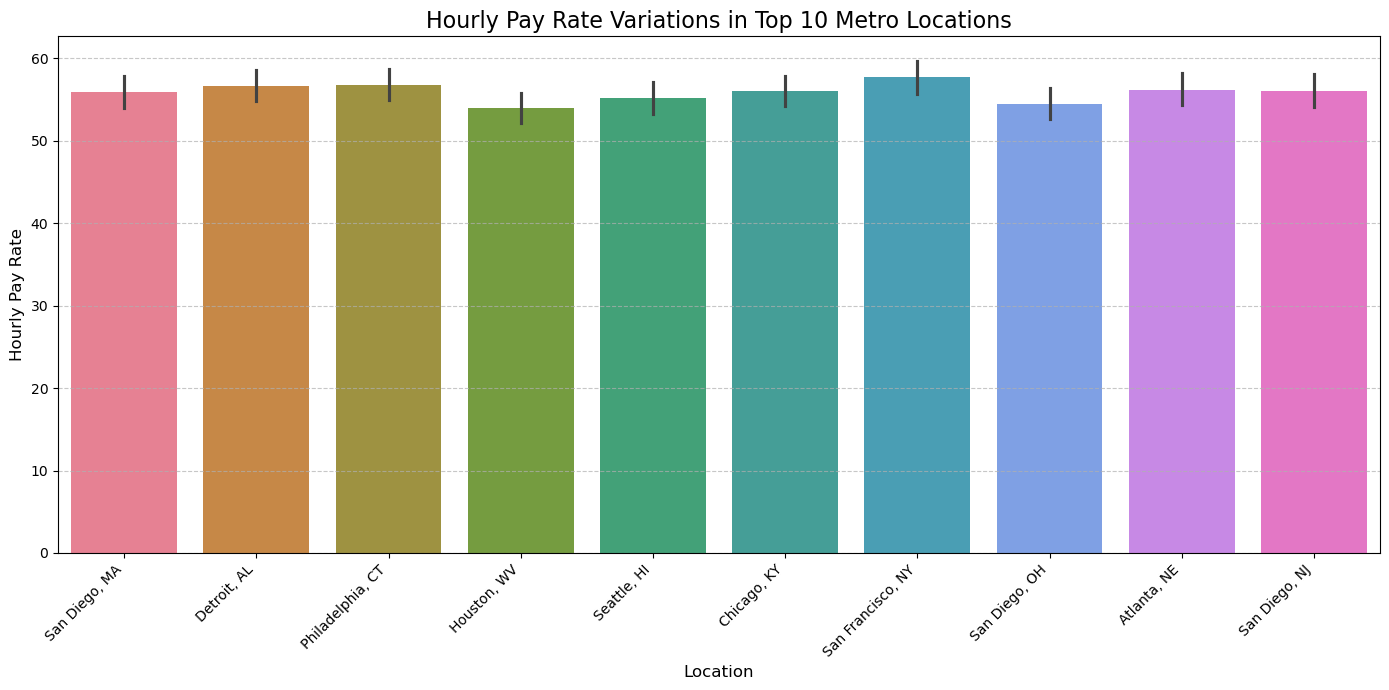

In [33]:
# 1. Variations in hourly pay rates across metros

# Find top 10 locations by frequency or average pay rate
top_10_locations = df['Location'].value_counts().nlargest(10).index

# Filter dataframe to include only top 10 locations
df_top_10 = df[df['Location'].isin(top_10_locations)]

# Create a color palette with 10 distinct colors
color_palette = sns.color_palette("husl", 10)

# Create the box plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_top_10, 
    x='Location', 
    y='Hourly Pay Rate',
    palette=color_palette
)

# Customize the plot
plt.title('Hourly Pay Rate Variations in Top 10 Metro Locations', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Hourly Pay Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

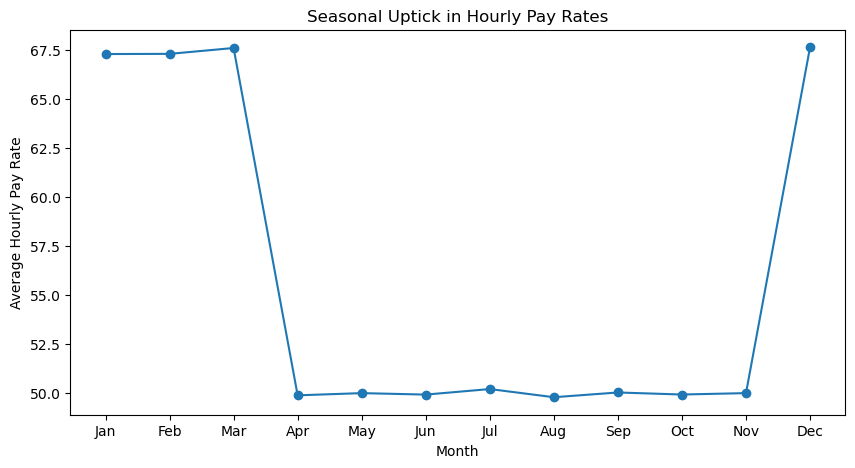

In [34]:
# 2. Analyze pay uptick during flu & holiday seasons
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])
df['Month'] = df['Contract Start Date'].dt.month
seasonal_uptick = df.groupby('Month')['Hourly Pay Rate'].mean()
plt.figure(figsize=(10, 5))
seasonal_uptick.plot(marker='o', title='Seasonal Uptick in Hourly Pay Rates')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Hourly Pay Rate')
plt.show()


In [35]:
# 3. Compare hourly pay rates with city desirability factors (mock data)
city_factors = {
    'Dallas': 3, 'Atlanta': 4, 'New York': 5, 'Philadelphia': 3, 'Washington': 4,
    'San Francisco': 5, 'Los Angeles': 4, 'Seattle': 5, 'Chicago': 3, 'San Diego': 4,
    'Miami': 4, 'Boston': 5, 'Detroit': 2, 'Phoenix': 3, 'Houston': 3
}
#df['City Desirability'] = df['Location'].apply(lambda loc: city_factors.get(loc.split(',')[0], np.nan))
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='City Desirability', y='Hourly Pay Rate', hue='Location')
#plt.title('Hourly Pay Rates vs City Desirability')
#plt.show() 



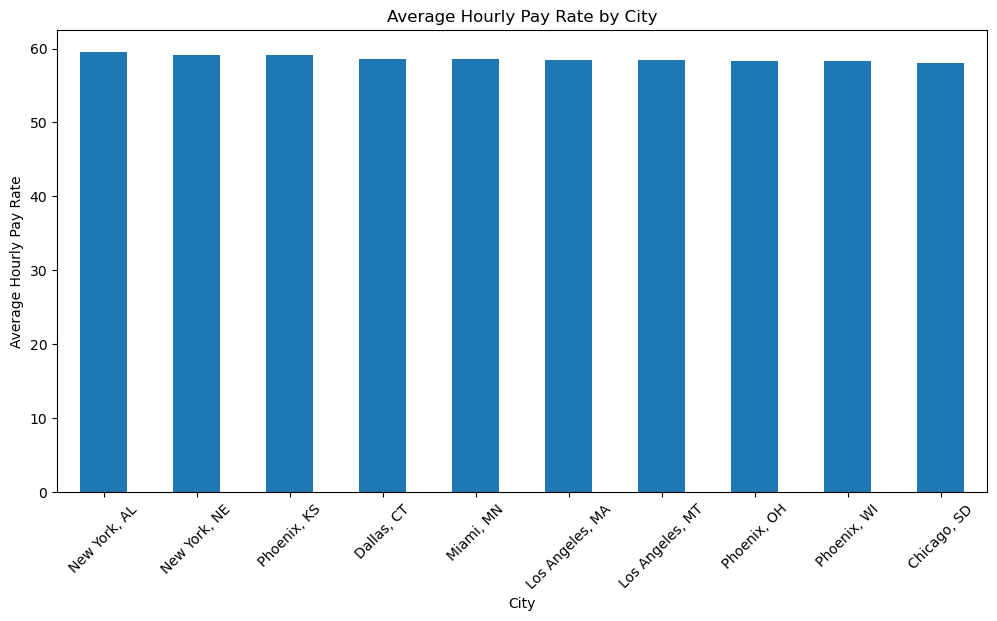

In [36]:
# Bar plot for city-wise hourly pay rates
city_pay_rates = df.groupby('Location')['Hourly Pay Rate'].mean().sort_values().nlargest(10)
plt.figure(figsize=(12, 6))
city_pay_rates.plot(kind='bar', title='Average Hourly Pay Rate by City')
plt.xlabel('City')
plt.ylabel('Average Hourly Pay Rate')
plt.xticks(rotation=45)
plt.show()

In [38]:
print(round(city_pay_rates, 2))

Location
New York, AL       59.53
New York, NE       59.16
Phoenix, KS        59.07
Dallas, CT         58.63
Miami, MN          58.55
Los Angeles, MA    58.49
Los Angeles, MT    58.45
Phoenix, OH        58.38
Phoenix, WI        58.29
Chicago, SD        58.07
Name: Hourly Pay Rate, dtype: float64


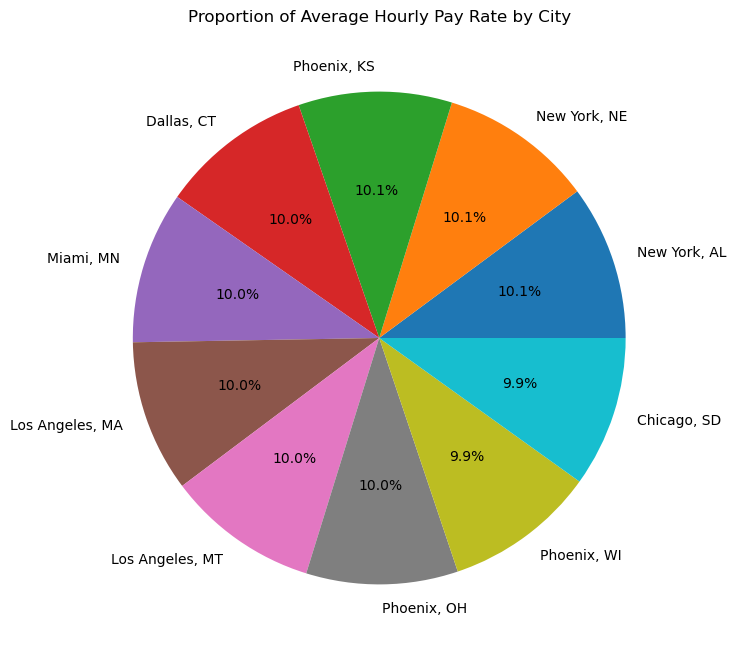

In [37]:
# Pie plot for city-wise hourly pay rates
plt.figure(figsize=(8, 8))
city_pay_rates.plot(kind='pie', title='Proportion of Average Hourly Pay Rate by City', autopct='%1.1f%%')
plt.ylabel('')  # Hides the default ylabel
plt.show()

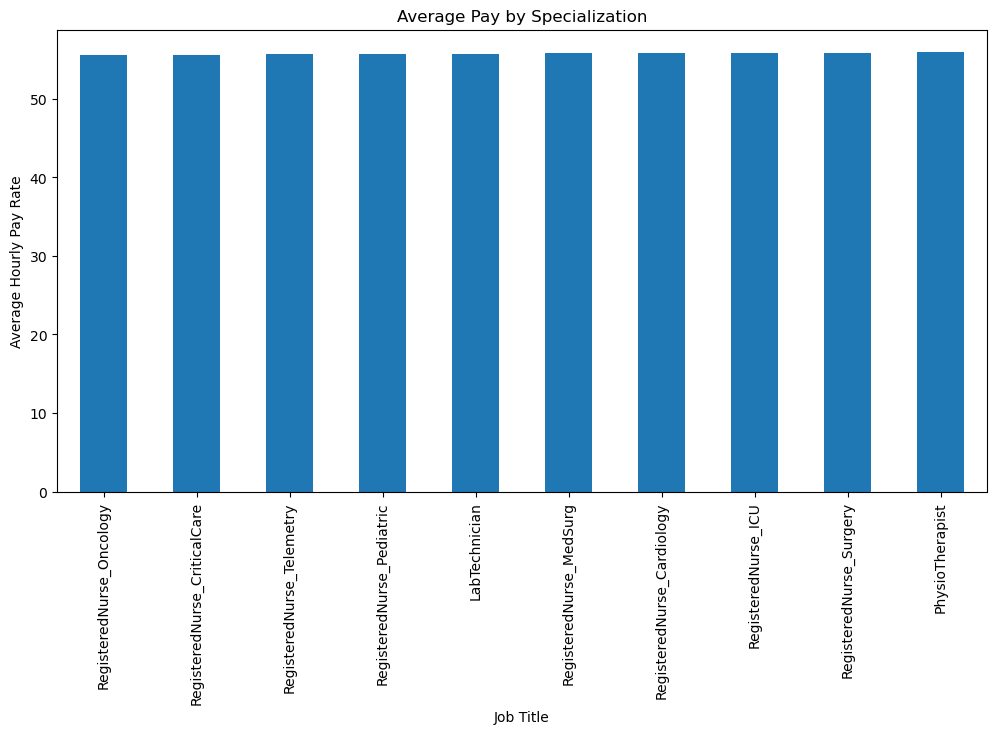

In [21]:
# 4. Identify higher-paying specializations
specialization_pay = df.groupby('Job Title')['Hourly Pay Rate'].mean().sort_values()
plt.figure(figsize=(12, 6))
specialization_pay.plot(kind='bar', title='Average Pay by Specialization')
plt.ylabel('Average Hourly Pay Rate')
plt.show()

In [24]:
print(round(specialization_pay, 2))

Job Title
RegisteredNurse_Oncology        55.58
RegisteredNurse_CriticalCare    55.62
RegisteredNurse_Telemetry       55.64
RegisteredNurse_Pediatric       55.68
LabTechnician                   55.73
RegisteredNurse_MedSurg         55.79
RegisteredNurse_Cardiology      55.80
RegisteredNurse_ICU             55.80
RegisteredNurse_Surgery         55.81
PhysioTherapist                 56.01
Name: Hourly Pay Rate, dtype: float64


### Machine Learning Model ###

Why Random forest ?

The Random Forest model was chosen for its ability to handle high-dimensional data, manage features effectively, and prevent overfitting through ensemble learning. It works by averaging the results of multiple decision trees, making it robust and less sensitive to noise in the data. Random Forest is particularly effective for regression problems where relationships between features and target variables are non-linear, which is suitable for predicting hourly pay rates influenced by multiple factors like location and job title.

In [40]:
df.columns

Index(['Job Title', 'Location', 'Hospital Name', 'Contract Start Date',
       'Contract End Date', 'Hourly Pay Rate', 'Month'],
      dtype='object')

In [41]:
df['City Desirability'] = df['Location'].apply(lambda loc: city_factors.get(loc.split(',')[0], np.nan))


In [42]:
# Prepare data for ML
X = pd.get_dummies(df[['Job Title', 'Location', 'City Desirability']], drop_first=True)
y = df['Hourly Pay Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for RF
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Metrics:")
print(f"MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Regressor Metrics:
MSE: 379.17, MAE: 15.99, R2: -0.04


In [45]:
# Save the Random Forest model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

In [43]:
### Deep Learning Model ###

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluation Metrics for NN
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Metrics:")
print(f"MSE: {mse_nn:.2f}, MAE: {mae_nn:.2f}, R2: {r2_nn:.2f}")


Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 440.9482 - mae: 16.9334 - val_loss: 414.6482 - val_mae: 16.3212
Epoch 2/10
5000/5000 [==============================] - 11s 2ms/step - loss: 392.8796 - mae: 16.1697 - val_loss: 387.2135 - val_mae: 16.1290
Epoch 3/10
5000/5000 [==============================] - 9s 2ms/step - loss: 385.0775 - mae: 16.0511 - val_loss: 387.7076 - val_mae: 15.9573
Epoch 4/10
5000/5000 [==============================] - 10s 2ms/step - loss: 380.3193 - mae: 15.9705 - val_loss: 378.5550 - val_mae: 16.0683
Epoch 5/10
5000/5000 [==============================] - 18s 4ms/step - loss: 376.9791 - mae: 15.9123 - val_loss: 382.4218 - val_mae: 16.2046
Epoch 6/10
5000/5000 [==============================] - 21s 4ms/step - loss: 373.7050 - mae: 15.8525 - val_loss: 375.5967 - val_mae: 15.9412
Epoch 7/10
5000/5000 [==============================] - 13s 3ms/step - loss: 371.1005 - mae: 15.8026 - val_loss: 369.7302 - val_mae: 15.8148
Epoch 8/10
5000

In [46]:
# Save the Neural Network model
nn_model.save("neural_network_model.h5")


In [47]:
# Save the scaler for normalization
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

### Neural Network Hyperparameter Tuning ###

In [ ]:

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_nn(optimizer='adam', learning_rate=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)  # Single output for regression
    ])
    optimizer_instance = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='mse', metrics=['mae'])
    return model

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
with open("scaler_tuned.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Wrap Keras model for GridSearchCV
nn = KerasRegressor(build_fn=create_nn, verbose=0)
param_grid_nn = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam'],
    'learning_rate': [0.001, 0.01, 0.1]
}
grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_nn.fit(X_train_scaled, y_train)

# Best Neural Network model
best_nn_params = grid_search_nn.best_params_
best_nn_model = grid_search_nn.best_estimator_
best_nn_model.model.save("neural_network_model_tuned.h5")

# Evaluate tuned Neural Network
y_pred_nn = best_nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Tuned Neural Network Metrics:")
print(f"MSE: {mse_nn:.2f}, MAE: {mae_nn:.2f}, R2: {r2_nn:.2f}")


C:\Users\Ishwar\AppData\Local\Temp\ipykernel_29900\454224007.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn = KerasRegressor(build_fn=create_nn, verbose=0)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Tuned Neural Network Metrics:
MSE: 364.20, MAE: 15.70, R2: -0.00
